In [43]:
#Cargar las librerias necesarias para la ejecución del proyecto modelo de predicción de retiros voluntarios

import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

In [44]:
#Cargar la base de datos con la cual vamos a trabajar en el proyecto
#Conocer 10 de los registros para entender la estructura de la base de datos

retiros=pd.read_csv("C:/Users/jforero/OneDrive - Grupo Bancolombia/91. Universidad - Especialización/Proyecto_Final_Retiros_Voluntarios/Retiros_historicos.csv")
retiros.head(10)

,ID_EMPLEADOS,COMPAÑÍA,CODIGO_AREA,AREA,CODIGO_CARGO,CARGO,REGION,FORMA_DE_TRABAJO,CLASE_DE_MEDIDA,MOTIVO_RETIRO,FECHA_DESDE,CODIGO_AREA_ANTERIOR,CODIGO_CARGO_ANTERIOR,AÑO,PERIODO,VP ACTUAL,VP ANT,2 ACT,2 ANT,3 ACT,3 ANT,4 ACT,4 ANT,5 ACT,5 ANT,NIVEL_DEL_CARGO,RED_DE_SUCURSALES,CARGO_ANTERIOR,COMPAÑÍA_AANTERIOR,NIVEL_DEL_CARGO_ANTERIOR,GÉNERO
0,3239,Bancolombia S.A.,70005072,SUC ARMENIA CENTRO CCIAL 1,99999999,Integración: Posición por defecto,Sur,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,31/03/2025,70005072.0,73929.0,2025,mar-25,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP,VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP,VICEPRESIDENCIA PERSONAS Y PYME SUR,VICEPRESIDENCIA PERSONAS Y PYME SUR,GCIA ZONA QUINDIO Y NORTE DEL VALLE,GCIA ZONA QUINDIO Y NORTE DEL VALLE,SUC ARMENIA CENTRO,SUC ARMENIA CENTRO,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,masculino
1,6119,Bancolombia S.A.,2738,SUC BANCA COLOMBIA OVIEDO DS,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,31/03/2025,2738.0,28681.0,2025,mar-25,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP,VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP,VICEPRESIDENCIA PERSONAS Y PYME ANTIOQUI,VICEPRESIDENCIA PERSONAS Y PYME ANTIOQUI,GCIA ZONA PREFERENCIAL BPP ANTIOQUIA,GCIA ZONA PREFERENCIAL BPP ANTIOQUIA,SUC BANCA COLOMBIA OVIEDO,SUC BANCA COLOMBIA OVIEDO,NaN,NaN,SUBGERENTE/A,Bancolombia S.A.,PROFESIONAL,femenino
2,10332,Bancolombia S.A.,70005179,SUC CALASANZ CCIAL 1,99999999,Integración: Posición por defecto,Antioquia,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,31/03/2025,70005179.0,54910.0,2025,mar-25,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP,VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP,VICEPRESIDENCIA PERSONAS Y PYME ANTIOQUI,VICEPRESIDENCIA PERSONAS Y PYME ANTIOQUI,GCIA ZONA OCCIDENTE BPP ANTIOQUIA,GCIA ZONA OCCIDENTE BPP ANTIOQUIA,SUC CALASANZ,SUC CALASANZ,NaN,NaN,ASESOR/A COMERCIAL PYME,Bancolombia S.A.,OPERATIVO,femenino
3,14050,Bancolombia S.A.,1005,SUC PUERTO LOPEZ,99999999,Integración: Posición por defecto,Centro,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,31/03/2025,1005.0,67260.0,2025,mar-25,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP,VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP,VICEPRESIDENCIA PERSONAS Y PYME CENTRO,VICEPRESIDENCIA PERSONAS Y PYME CENTRO,GCIA ZONA ORINOQUIA Y AMAZONIA BPP CENTR,GCIA ZONA ORINOQUIA Y AMAZONIA BPP CENTR,SUC PUERTO LOPEZ,SUC PUERTO LOPEZ,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,femenino
4,15715,Bancolombia S.A.,2115,SUC BELLO DS,99999999,Integración: Posición por defecto,Antioquia,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,31/03/2025,2115.0,52493.0,2025,mar-25,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP,VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP,VICEPRESIDENCIA PERSONAS Y PYME ANTIOQUI,VICEPRESIDENCIA PERSONAS Y PYME ANTIOQUI,GCIA ZONA NORTE Y CHOCO BPP ANTIOQUIA,GCIA ZONA NORTE Y CHOCO BPP ANTIOQUIA,SUC BELLO,SUC BELLO,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,femenino
5,19401,Valores Bancolombia S.A.,70004166,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),RETIRO VOLUNTARIO,31/03/2025,70004166.0,22852.0,2025,mar-25,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA GESTION DE INVERSIONES,VICEPRESIDENCIA GESTION DE INVERSIONES,VICEPRESIDENCIA COMERCIAL DE INVERSIONES,VICEPRESIDENCIA COMERCIAL DE INVERSIONES,GCIA REGIONAL PRIV PREF ANTIOQUIA,GCIA REGIONAL PRIV PREF ANTIOQUIA,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,NaN,NaN,GERENTE/A BANCA PRIVADA,Valores Bancolombia S.A.,ESTRATEGICO MEDIO,femenino
6,21439,

# DESCRIPCION DE LAS FEATURES DE DATASET DE LAS NOVEDADES DE LOS EMPLEADOS:

ID_EMPLEADOS: Es el código único del empleados, sirve como identificador

COMPAÑÍA: Internamente la organización tiene varias subcompañias, acá el nombre de cada una

CODIGO_AREA: Es el código con el cual se identifica el área donde trabaja el empleado

AREA: Es la descripción del área donde trabaja el empleado

CODIGO_CARGO: Es el código con el cual se identifica el cargo del empleado

CARGO:Es la descripción del cargo donde trabaja el empleado

REGION: Esta distribuido en las 5 regiones de Colombia

FORMA_DE_TRABAJO: clasificación de organización, entre empleados operativos (convencionados) o  profesionales (no convencionados, en transición)

CLASE_DE_MEDIDA: Es la novedad que se le aplica al empleado de acuerdo a: contratación, retiro, impacto salarial, ascenso o traslado horizontal.

MOTIVO_RETIRO: Es el motivo detallado de la clase de medida

FECHA_DESDE: Es la fecha exacta en la cual se aplica la novedad del empleado

CODIGO_AREA_ANTERIOR:  Es el código con el cual se identifica el área del empleado antes de la novedad

CODIGO_CARGO_ANTERIOR: Es el código con el cual se identifica el cargo del empleado antes de la novedad

AÑO: Es al año en la cual se aplico la novedad

PERIODO: Es el mes y año en la cual se aplico la novedad

VP ACTUAL: Es la vicepresidencia (1er nivel) donde se encuentra estructuralmente el empleado

VP ANT:  Es la vicepresidencia (1er nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

2 ACT:  Es el área (2do nivel) donde se encuentra estructuralmente el empleado

2 ANT:   Es el área (2do nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

3 ACT:   Es el área (3cer nivel) donde se encuentra estructuralmente el empleado

3 ANT:   Es el área (3cer nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

4 ACT:   Es el área (4to nivel) donde se encuentra estructuralmente el empleado

4 ANT:   Es el área (4to nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

5 ACT:   Es el área (5to nivel) donde se encuentra estructuralmente el empleado

5 ANT:   Es el área (5to nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

NIVEL_DEL_CARGO: Es la clasificación del cargo de acuerdo a su descripción 

RED_DE_SUCURSALES: Es la clasificación de los empelados de acuerdo a los comerciales y administrativos

CARGO_ANTERIOR: Es la descripción del cargo antes de la novedad

COMPAÑÍA_AANTERIOR: Internamente la organización tiene varias subcompañias, acá el nombre de cada una, es la compañia antes de la novedad

NIVEL_DEL_CARGO_ANTERIOR: Es la clasificación del cargo de acuerdo a su descripción, antes de la novedad

GÉNERO: Es la identificación del sexo del empleado

In [45]:
#Conteo de registros por cada una de las variables
#Conocer la forma de la base de datos

print("Forma de la base de retiros (filas, columnas):", retiros.shape)
print(f"Total de registros: {retiros.shape[0]}")
print(f"Total de columnas: {retiros.shape[1]}")

Forma de la base de retiros (filas, columnas): (83142, 31)
Total de registros: 83142
Total de columnas: 31


In [46]:
#Conozcamos a nivel general el detalle de los columnas de la base de datos
#Conocer la cantidad de registros y columnas que tiene la base de datos

retiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83142 entries, 0 to 83141
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_EMPLEADOS              83142 non-null  int64  
 1   COMPAÑÍA                  83142 non-null  object 
 2   CODIGO_AREA               83142 non-null  int64  
 3   AREA                      83131 non-null  object 
 4   CODIGO_CARGO              83142 non-null  int64  
 5   CARGO                     83142 non-null  object 
 6   REGION                    83142 non-null  object 
 7   FORMA_DE_TRABAJO          83142 non-null  object 
 8   CLASE_DE_MEDIDA           83142 non-null  object 
 9   MOTIVO_RETIRO             83142 non-null  object 
 10  FECHA_DESDE               83142 non-null  object 
 11  CODIGO_AREA_ANTERIOR      70055 non-null  float64
 12  CODIGO_CARGO_ANTERIOR     66875 non-null  float64
 13  AÑO                       83142 non-null  int64  
 14  PERIOD

In [48]:
#con este código podemos observar todas las columnas del df de forma aleatoria en sus registros

pd.set_option("display.max_columns",None)              
retiros.sample(2)

,ID_EMPLEADOS,COMPAÑÍA,CODIGO_AREA,AREA,CODIGO_CARGO,CARGO,REGION,FORMA_DE_TRABAJO,CLASE_DE_MEDIDA,MOTIVO_RETIRO,FECHA_DESDE,CODIGO_AREA_ANTERIOR,CODIGO_CARGO_ANTERIOR,AÑO,PERIODO,VP ACTUAL,VP ANT,2 ACT,2 ANT,3 ACT,3 ANT,4 ACT,4 ANT,5 ACT,5 ANT,NIVEL_DEL_CARGO,RED_DE_SUCURSALES,CARGO_ANTERIOR,COMPAÑÍA_AANTERIOR,NIVEL_DEL_CARGO_ANTERIOR,GÉNERO
35255,19230,Valores Bancolombia S.A.,1234,GCIA REGIONAL CARIBE INVERSIONES,17570,GERENTE/A COMERCIAL CORPORATIVO,Caribe,No Convencionad (CO),CAMBIO ORG. CON CAM. REM (CO),PROMOCIÓN,1/11/2022,1234.0,17570.0,2022,nov-22,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA GESTION DE INVERSIONES,VICEPRESIDENCIA GESTION DE INVERSIONES,VICEPRESIDENCIA COMERCIAL DE INVERSIONES,VICEPRESIDENCIA COMERCIAL DE INVERSIONES,GCIA REGIONAL CARIBE INVERSIONES,GCIA REGIONAL CARIBE INVERSIONES,NO APLICA,NO APLICA,JEFE,GRUPO SIN RED DE SUCURSALES,GERENTE/A COMERCIAL CORPORATIVO,Valores Bancolombia S.A.,JEFE,femenino
67983,25579,Bancolombia S.A.,2779,SECCION PLATAFORMAS CENTRALES ABIERTAS,43592,ANALISTA III,Dirección gener,No Convencionad (CO),CAMBIO ORG. CON CAM. REM (CO),PROMOCIÓN,1/11/2016,1862.0,6764.0,2016,nov-16,VICEPRESIDENCIA SERVICIOS CORPORATIVOS,VICEPRESIDENCIA DE NEGOCIOS,VICEPRESIDENCIA SERV DE TECNOLOGIA,VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP,CDE PLATAFORMA Y DISPONIB ON PREMISE TI,VICEPRESIDENCIA PERSONAS Y PYME CENTRO,ADC PLATAFORMAS CENTRALES TI,GCIA ZONA NORTE DE SANTANDER Y ARAUCA,CENTRALES SERVICIOS INFRA,SUC VENTURA PLAZA,PROFESIONALES,GRUPO SIN RED DE SUCURSALES,CAJERO PRINCIPAL,Bancolombia S.A.,OPERATIVO,Masculino


In [49]:
#Conocer los valores unicos por clase de medida
retiros["CLASE_DE_MEDIDA"].value_counts()     



CLASE_DE_MEDIDA
CAMBIO ORG. SIN CAM. REM (CO)    25292
CAMBIO ORG. CON CAM. REM (CO)    25086
RETIRO (CO)                      16174
CONTRATACION (CO)                13075
IMPACTO SALARIAL (CO)             3514
RECONTRATACION (CO)                  1
Name: count, dtype: int64

In [52]:
#En el campo de clase de medida, debemos finalmente dejar 2 clases para poder realizar el modelo de predicción, estos son: ACTIVO o RETIRO, en ese sentido, las clasificaciones diferentes a RETIRO serán reemplazadas por ACTIVO

retiros['CLASE_DE_MEDIDA'] = retiros['CLASE_DE_MEDIDA'].replace({
    'CAMBIO ORG. SIN CAM. REM (CO)': 'ACTIVO',
    'CAMBIO ORG. CON CAM. REM (CO)': 'ACTIVO',
    'CONTRATACION (CO)': 'ACTIVO',
    'IMPACTO SALARIAL (CO)': 'ACTIVO',
    'RECONTRATACION (CO)': 'ACTIVO'
})

In [53]:
#Validamos si efectivamente el cambio fue aplicado

print(retiros['CLASE_DE_MEDIDA'].value_counts())

CLASE_DE_MEDIDA
ACTIVO         66968
RETIRO (CO)    16174
Name: count, dtype: int64


In [54]:
# Limpieza de la clase RETIRO, quiero quitar el nombre RETIRO (CO) y dejar solo RETIRO

retiros['CLASE_DE_MEDIDA'] = retiros['CLASE_DE_MEDIDA'].replace({
    'RETIRO (CO)': 'RETIRO',
    })

In [55]:
#Validamos finalmente como quedan las 2 clases de la columna con la cual vamos a predecir:

print(retiros['CLASE_DE_MEDIDA'].value_counts())

CLASE_DE_MEDIDA
ACTIVO    66968
RETIRO    16174
Name: count, dtype: int64


Con el código anterior se evidencia que finalmente tenemos 2 clases, cuya proporción es: ACTIVO: 76% y RETIRO: 24%; Según las recomendaciones y literatura es una buena proporción, y no se evidencia inicialmente problemas de desbalanceo.

In [58]:
#Conocer los Valores unicos por campo:  motivo de retiro, el cual tiene el detalle de los motivos por los cuales se retiran los empleados
retiros["MOTIVO_RETIRO"].value_counts()  

MOTIVO_RETIRO
PROMOCIÓN                         23787
TRASLADO HORIZONTAL               21313
CONTRATACIÓN                      13070
RETIRO                            11329
TRASLADO POR CAMBIO DE OFICINA     3147
RETIRO SIN JUSTA CAUSA             1819
MOD. POR CAMBIO DE JORNADA         1708
RETIRO POR JUSTA CAUSA             1513
AUMENTO POR NIVELACIÓN             1280
SUSTITUCION PATRONAL INTERNA       1278
DESCENSO                            800
FINALIZACIÓN CONTRATO TÉRMINO       635
RETIRO POR PENSIÓN                  570
AUMENTO POR 20 AÑOS SERVICIO        465
RETIRO EN PERIODO DE PRUEBA         160
RETIRO POR FALLECIMIENTO            110
CAMBIO RÉGIMEN NUEVO A INTEGRA       61
RETIRO POR SUSTITUCIÓN PATRONA       22
TRASLADO X DESCENSO                  14
SUSTITUCION PATRONAL EXTERNA         13
REINTEGRO                            11
RETIRO POR OTRAS CAUSAS              10
IMPLEMENTACIÓN ESCALAFÓN              8
CUBRIMIENTO DE VACANTE                5
CANCELACIÓN CONTRATO TÉRMI

IMPORTANTE: Tener en cuenta que no todos los retiros se pueden predecir, debido a que tenemos algunos motivos de retiro como: jubilación, justa causa, mutuo acuerdo, entre otros que no se pueden controlar, en ese sentido, vamos a revisar la columna de "motivo de medida" y poder tener en cuenta solo los motivos de: RETIRO VOLUNTARIO y RETIRO VOLUNTARIO ARREGLO MUTUO.

In [59]:
#Hacemos la homologación y validamos:

retiros['MOTIVO_RETIRO'] = retiros['MOTIVO_RETIRO'].replace({
    'VOLUNTARIO ARREGLO MUTUO': 'RETIRO',
    'RETIRO VOLUNTARIO': 'RETIRO'
})
retiros["MOTIVO_RETIRO"].value_counts()  

MOTIVO_RETIRO
PROMOCIÓN                         23787
TRASLADO HORIZONTAL               21313
CONTRATACIÓN                      13070
RETIRO                            11329
TRASLADO POR CAMBIO DE OFICINA     3147
RETIRO SIN JUSTA CAUSA             1819
MOD. POR CAMBIO DE JORNADA         1708
RETIRO POR JUSTA CAUSA             1513
AUMENTO POR NIVELACIÓN             1280
SUSTITUCION PATRONAL INTERNA       1278
DESCENSO                            800
FINALIZACIÓN CONTRATO TÉRMINO       635
RETIRO POR PENSIÓN                  570
AUMENTO POR 20 AÑOS SERVICIO        465
RETIRO EN PERIODO DE PRUEBA         160
RETIRO POR FALLECIMIENTO            110
CAMBIO RÉGIMEN NUEVO A INTEGRA       61
RETIRO POR SUSTITUCIÓN PATRONA       22
TRASLADO X DESCENSO                  14
SUSTITUCION PATRONAL EXTERNA         13
REINTEGRO                            11
RETIRO POR OTRAS CAUSAS              10
IMPLEMENTACIÓN ESCALAFÓN              8
CUBRIMIENTO DE VACANTE                5
CANCELACIÓN CONTRATO TÉRMI

In [60]:
# Teniendo en cuenta el punto anterior, se debe dejar el DATASET solo con los activos y con los retiros que icnluyan el motivo de la medida: RETIRO (El cual significa retiros voluntario y voluntario arreglo mutuo)
#Llamaremos el nuevo Dataset como retiros_definitivos
retiros_definitivos = retiros[
    ((retiros['CLASE_DE_MEDIDA'] == 'RETIRO') & (retiros['MOTIVO_RETIRO'] == 'RETIRO')) |
    (retiros['CLASE_DE_MEDIDA'] == 'ACTIVO')
]

In [65]:
#Validamos la cantidad de registros que tenemos en el nuevo dataset

print(retiros_definitivos['CLASE_DE_MEDIDA'].value_counts())

CLASE_DE_MEDIDA
ACTIVO    66968
RETIRO    11329
Name: count, dtype: int64


Con este cambio del Dataset las 2 clases quedaron así: ACTIVO (86%) y RETIRO (14%), con está distribución las muestras quedan desbalanceadas, sin embargo, vamos a hacer el modelo con esta información y dependiendo de los resultados validamos si debemos aplicar alguna técnica avanzada.

## LIMPIEZA Y TRANSFORMACIÓN DE LOS DATOS

In [66]:
#Con el nuevo DataSet vamos a hacer transformación y limpieza de datos
retiros_definitivos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78297 entries, 0 to 83141
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_EMPLEADOS              78297 non-null  int64  
 1   COMPAÑÍA                  78297 non-null  object 
 2   CODIGO_AREA               78297 non-null  int64  
 3   AREA                      78286 non-null  object 
 4   CODIGO_CARGO              78297 non-null  int64  
 5   CARGO                     78297 non-null  object 
 6   REGION                    78297 non-null  object 
 7   FORMA_DE_TRABAJO          78297 non-null  object 
 8   CLASE_DE_MEDIDA           78297 non-null  object 
 9   MOTIVO_RETIRO             78297 non-null  object 
 10  FECHA_DESDE               78297 non-null  object 
 11  CODIGO_AREA_ANTERIOR      65211 non-null  float64
 12  CODIGO_CARGO_ANTERIOR     62335 non-null  float64
 13  AÑO                       78297 non-null  int64  
 14  PERIODO    

Existe algunas columnas que no son necesarias para el modelo de predicción, por lo tanto, se deben eliminar
Las columnas que no son necesarias para el modelo de predicción son:

1. Las columnas que son del cargo anterior no son necesarias porque no vamos a analizar novedades internas sino retiros: COMPAÑÍA_AANTERIOR, NIVEL_DEL_CARGO_ANTERIOR

2. Códigos que son generales y no generan valor como: CODIGO_AREA, CODIGO_CARGO, CODIGO_AREA_ANTERIOR, CODIGO_CARGO_ANTERIOR.

3. Quitar el campo MOTIVO_RETIRO porque con los ajustes anteriores el campo necesario es CLASE_DE_MEDIDA

4. Existen 2 campos que traducen la fecha de la novedad, dejamos la fecha más completa, por ende depuramos: AÑO, PERIODO

5. Dentro del Dataset tenemos los niveles de estructura de la organización, por eso quitamos los niveles actuales y anteriores: VP ANT, 2 ACT, 2 ANT, 3 ACT, 3 ANT, 4 ACT, 4 ANT, 5 ACT, 5 ANT

In [86]:
#Creamos en nuevo Dataset depurando las columnas que no son necesarias para el modelo de predicción

columnas_a_eliminar = ['CODIGO_AREA', 'CODIGO_CARGO', 'MOTIVO_RETIRO', 'CODIGO_AREA_ANTERIOR', 'CODIGO_CARGO_ANTERIOR','NIVEL_DEL_CARGO_ANTERIOR', 'AÑO', "PERIODO", "COMPAÑÍA_AANTERIOR", "VP ANT", "2 ACT", "2 ANT", "3 ACT", "3 ANT", "4 ACT", "4 ANT", "5 ACT", "5 ANT"]  
retiros_modelo = retiros_definitivos.drop(columns=columnas_a_eliminar)

In [87]:
# Conocer el nuevo Dataset y la cantidad de registros que tenemos
print("Forma de la base de retiros (filas, columnas):", retiros_modelo.shape)
print(f"Total de registros: {retiros_modelo.shape[0]}")
print(f"Total de columnas: {retiros_modelo.shape[1]}")

Forma de la base de retiros (filas, columnas): (78297, 13)
Total de registros: 78297
Total de columnas: 13


In [89]:
# Conocer detalle de cada uno de las Features
retiros_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78297 entries, 0 to 83141
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID_EMPLEADOS       78297 non-null  int64 
 1   COMPAÑÍA           78297 non-null  object
 2   AREA               78286 non-null  object
 3   CARGO              78297 non-null  object
 4   REGION             78297 non-null  object
 5   FORMA_DE_TRABAJO   78297 non-null  object
 6   CLASE_DE_MEDIDA    78297 non-null  object
 7   FECHA_DESDE        78297 non-null  object
 8   VP ACTUAL          78285 non-null  object
 9   NIVEL_DEL_CARGO    75951 non-null  object
 10  RED_DE_SUCURSALES  75951 non-null  object
 11  CARGO_ANTERIOR     72110 non-null  object
 12  GÉNERO             78297 non-null  object
dtypes: int64(1), object(12)
memory usage: 8.4+ MB


In [90]:
#Conociendo el tipo de dato de cada uno de los Features, vamos a hacer la transformación de los datos para que sean numéricos y no categóricos
#Transformamos la columna de fecha a tipo datetime
retiros_modelo['FECHA_DESDE'] = pd.to_datetime(retiros_modelo['FECHA_DESDE'], format='%d/%m/%Y', errors='coerce')

In [99]:
#Seguimos con la transformación de algunas features en categoricas 
retiros_modelo['GÉNERO'] = retiros_modelo['GÉNERO'].astype('category')
retiros_modelo['CLASE_DE_MEDIDA'] = retiros_modelo['CLASE_DE_MEDIDA'].astype('category')
retiros_modelo['REGION'] = retiros_modelo['REGION'].astype('category')
retiros_modelo['FORMA_DE_TRABAJO'] = retiros_modelo['FORMA_DE_TRABAJO'].astype('category')
retiros_modelo['RED_DE_SUCURSALES'] = retiros_modelo['RED_DE_SUCURSALES'].astype('category')

In [103]:
#Finalmente hacemos validación del tio de dato de las Features
print(retiros_modelo.dtypes)

ID_EMPLEADOS                  int64
COMPAÑÍA                     object
AREA                         object
CARGO                        object
REGION                     category
FORMA_DE_TRABAJO           category
CLASE_DE_MEDIDA            category
FECHA_DESDE          datetime64[ns]
VP ACTUAL                    object
NIVEL_DEL_CARGO              object
RED_DE_SUCURSALES          category
CARGO_ANTERIOR               object
GÉNERO                     category
dtype: object


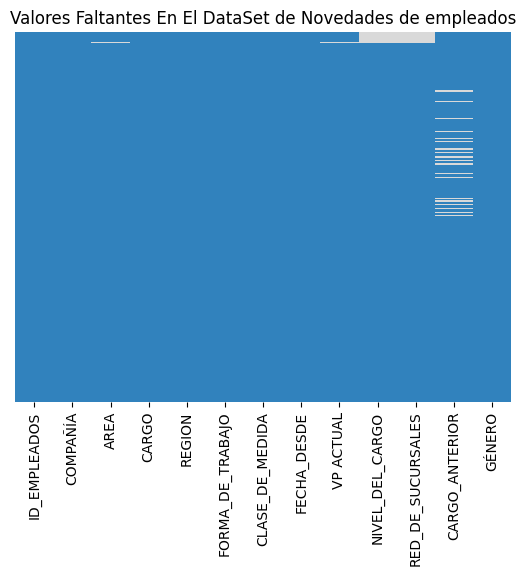

In [105]:
#Identificar datos faltantes de los features del dataset
sns.heatmap(retiros_modelo.isnull(), yticklabels=False, cbar=False, cmap='tab20c')
plt.title('Valores Faltantes En El DataSet de Novedades de empleados')
plt.show()

Se evidencia que los campos de: AREA, VP ACTUAL, NIVEL_DEL_CARGO, RED_DE_SUCURSALES y CARGO_ANTERIOR tienen nulos, pero no están muy concentrados, es decir, a pesar que existen nulos no superan un 30% para ser una variable a eliminar, siendo así, vamos a trabajar en la imputación de esos campos nulos.

In [110]:
#Haciendo un análisis de los campos nulos (faltantes) en el dataset, se puede afirmar que los campos: área, VP Actual y cargo anterior se pueden diligenciar con NO APLICA, porque algunos de estos pueden ser contrataciones, y al ser una contratación nueva no le han asignado aún el área, la vicepresidencia y no tenian cargo actual

#En ese sentido, se reemplazan los valores nulos por NO APLICA
retiros_modelo['AREA'].fillna('NO APLICA', inplace=True)
retiros_modelo['VP ACTUAL'].fillna('NO APLICA', inplace=True)
retiros_modelo['CARGO_ANTERIOR'].fillna('NO APLICA', inplace=True)



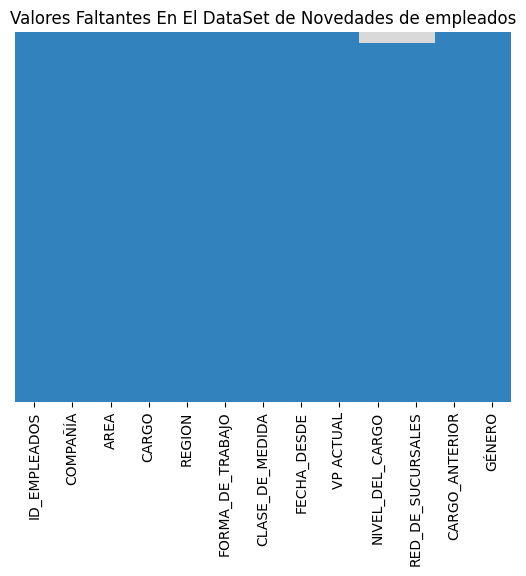

In [111]:
#Validamos nuevamente los datos faltantes
sns.heatmap(retiros_modelo.isnull(), yticklabels=False, cbar=False, cmap='tab20c')
plt.title('Valores Faltantes En El DataSet de Novedades de empleados')
plt.show()

In [112]:
#Según la validación y el gráfico anterior, solo tendríamos nulos en NIVEL_DEL_CARGO y RED_DE_SUCURSALES, vamos a conocer cuantos registros son
print("Cantidad de registros nulos en NIVEL_DEL_CARGO:", retiros_modelo['NIVEL_DEL_CARGO'].isnull().sum())
print("Cantidad de registros nulos en RED_DE_SUCURSALES:", retiros_modelo['RED_DE_SUCURSALES'].isnull().sum())


Cantidad de registros nulos en NIVEL_DEL_CARGO: 2346
Cantidad de registros nulos en RED_DE_SUCURSALES: 2346


In [113]:
#Son exactamente la misma cantidad de registros, es una proporción relativamente pequeña con respecto al dataset completo, pero, son registros que no podemos eliminar, por ese motivo vamos a imputar con la moda ya que son datos categoricos
#primero conocemos las medidas de tendencia central de los campos que tienen nulos
print("Moda de NIVEL_DEL_CARGO:", retiros_modelo['NIVEL_DEL_CARGO'].mode()[0])
print("Moda de RED_DE_SUCURSALES:", retiros_modelo['RED_DE_SUCURSALES'].mode()[0])


Moda de NIVEL_DEL_CARGO: OPERATIVO
Moda de RED_DE_SUCURSALES: GRUPO SIN RED DE SUCURSALES


In [ ]:
#imputamos los nulos de los campos NIVEL_DE_CARGO y RED_DE_SUCURSALES con la moda

retiros_modelo['NIVEL_DEL_CARGO'].fillna(retiros_modelo['NIVEL_DEL_CARGO'].mode()[0], inplace=True)
retiros_modelo['RED_DE_SUCURSALES'].fillna(retiros_modelo['RED_DE_SUCURSALES'].mode()[0], inplace=True)


In [118]:
#Validamos finalmente la cantidad de nulos que tenemos en el dataset
print("Cantidad de registros nulos en NIVEL_DEL_CARGO:", retiros_modelo['NIVEL_DEL_CARGO'].isnull().sum())
print("Cantidad de registros nulos en RED_DE_SUCURSALES:", retiros_modelo['RED_DE_SUCURSALES'].isnull().sum())


Cantidad de registros nulos en NIVEL_DEL_CARGO: 0
Cantidad de registros nulos en RED_DE_SUCURSALES: 0


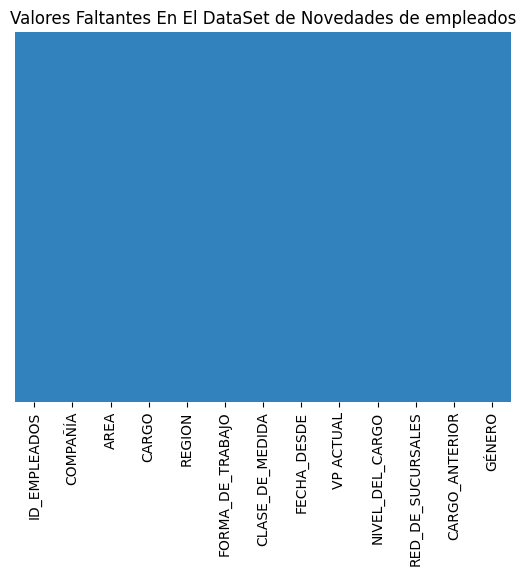

In [119]:
#graficamente a continuación nos damos cuenta que ya no tenemos datos nulos
sns.heatmap(retiros_modelo.isnull(), yticklabels=False, cbar=False, cmap='tab20c')
plt.title('Valores Faltantes En El DataSet de Novedades de empleados')
plt.show()

# ANALITICA DESCRIPTIVA DE LAS FEATURES E INGENIERA DE LOS DATOS

C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\2236498820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=retiros_modelo, x='CLASE_DE_MEDIDA', palette='Set2')


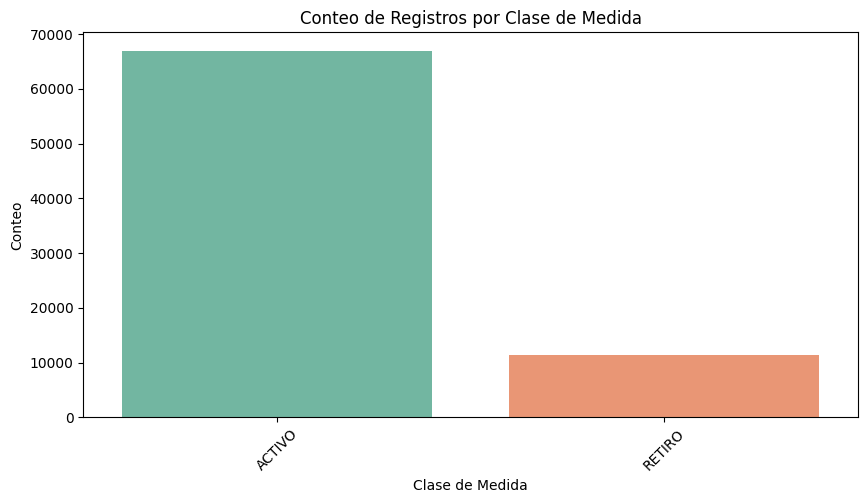

In [121]:
#GRAFICO DE BARRAS PARA CONOCER LOS REGISTROS POR CADA UNA DE LAS CLASES DE MEDIDA Y SU PROPORCION
#Vamos a graficar la cantidad de registros por cada una de las clases de medida, para conocer la proporción de cada una de ellas
plt.figure(figsize=(10, 5))
sns.countplot(data=retiros_modelo, x='CLASE_DE_MEDIDA', palette='Set2')
plt.title('Conteo de Registros por Clase de Medida')
plt.xlabel('Clase de Medida')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()


C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\1261485976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=retiros_modelo, x='GÉNERO', palette='Set2')


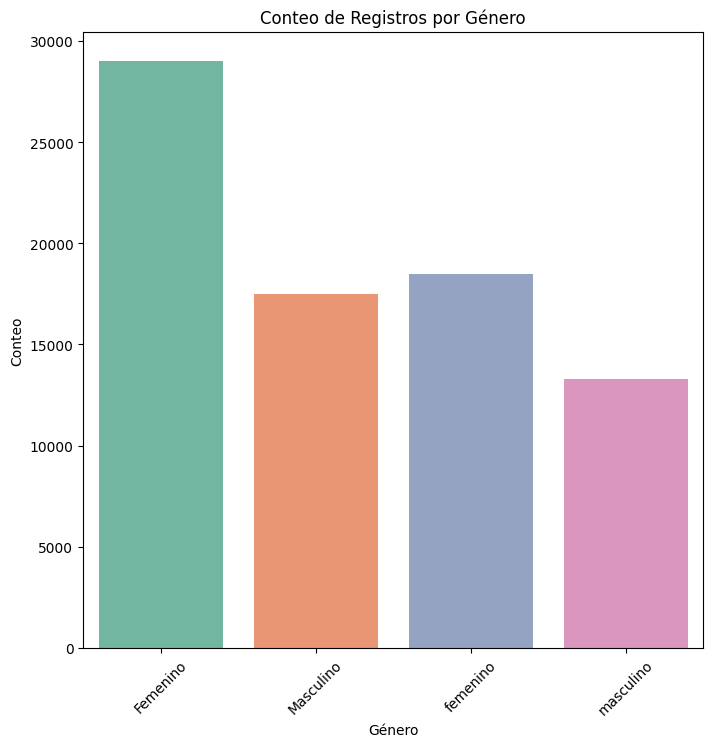

In [ ]:
#Grafica de barras para conocer la proporción por género
plt.figure(figsize=(8, 8))
sns.countplot(data=retiros_modelo, x='GÉNERO', palette='Set2')
plt.title('Conteo de Registros por Género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()



In [124]:
#Según el grafico anterior se evidencia que tenemos un error en la calidad de los datos, por ese motivo vamos a reemplazar los valores de género en mayuscula
#por los valores en minuscula, para que sean homogeneos
#Reemplazamos los valores de la columna GÉNERO
retiros_modelo['GÉNERO'] = retiros_modelo['GÉNERO'].replace({
    'M': 'masculino',
    'F': 'femenino',
    'Masculino': 'masculino',
    'Femenino': 'femenino',
    'masculino': 'masculino',
    'femenino': 'femenino',
})


C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\1334327079.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  retiros_modelo['GÉNERO'] = retiros_modelo['GÉNERO'].replace({


GÉNERO
femenino     47475
masculino    30822
Name: count, dtype: int64


C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\2274079562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=retiros_modelo, x='GÉNERO', palette='Set2')


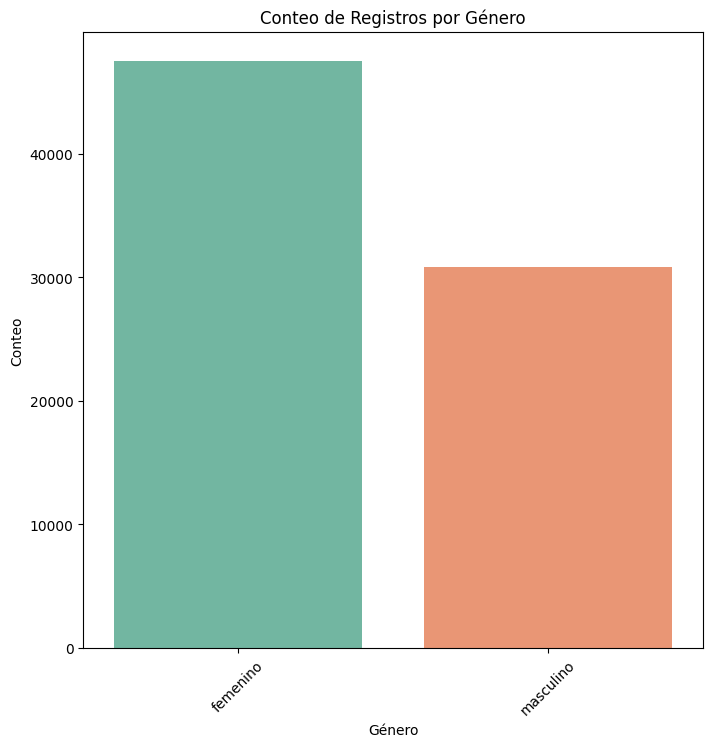

In [ ]:
#con el siguiente código validamos que efectivamente el cambio fue aplicado
print(retiros_modelo['GÉNERO'].value_counts())
#Grafica de barras para conocer la proporción por género
plt.figure(figsize=(8, 8))
sns.countplot(data=retiros_modelo, x='GÉNERO', palette='Set2')
plt.title('Conteo de Registros por Género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()

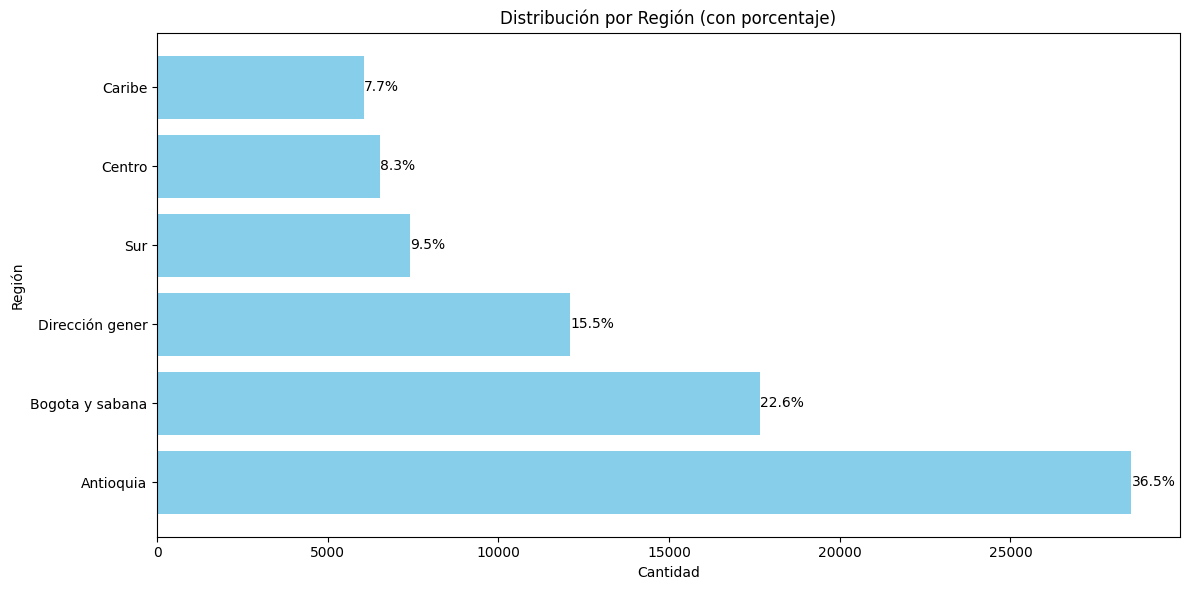

In [128]:
#validamos graficamente la columna región
# Calcular los valores y porcentajes
conteo = retiros_modelo['REGION'].value_counts()
porcentajes = conteo / conteo.sum() * 100

plt.figure(figsize=(12, 6))
bars = plt.barh(conteo.index, conteo.values, color='skyblue')

# Añadir etiquetas de porcentaje al lado de cada barra
for bar, porcentaje in zip(bars, porcentajes):
    plt.text(bar.get_width() + 5,            # posición x del texto
             bar.get_y() + bar.get_height()/2,  # posición y centrada
             f'{porcentaje:.1f}%',           # texto: porcentaje con 1 decimal
             va='center')

plt.title('Distribución por Región (con porcentaje)')
plt.xlabel('Cantidad')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

In [131]:
#El gráfico el bien interesante y acá se evidencia otro cambio que podemos hacer, es que la región Dirección gener no es una región como tal (es una representación), en ese sentido se puede homologar con la región Antioquia, ya que dirección general son aquellos empleaods que están en Antioquia pero en la parte admministrativa, pero al final con Antioquia
#Reemplazamos los valores de la columna REGION
retiros_modelo['REGION'] = retiros_modelo['REGION'].replace({
    'Dirección General': 'Antioquia',
    'Dirección General (CO)': 'Antioquia',
    'Dirección General (CO) ': 'Antioquia',
    'Dirección General ': 'Antioquia',
    'Dirección gener': 'Antioquia'
})

C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\1976884766.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  retiros_modelo['REGION'] = retiros_modelo['REGION'].replace({


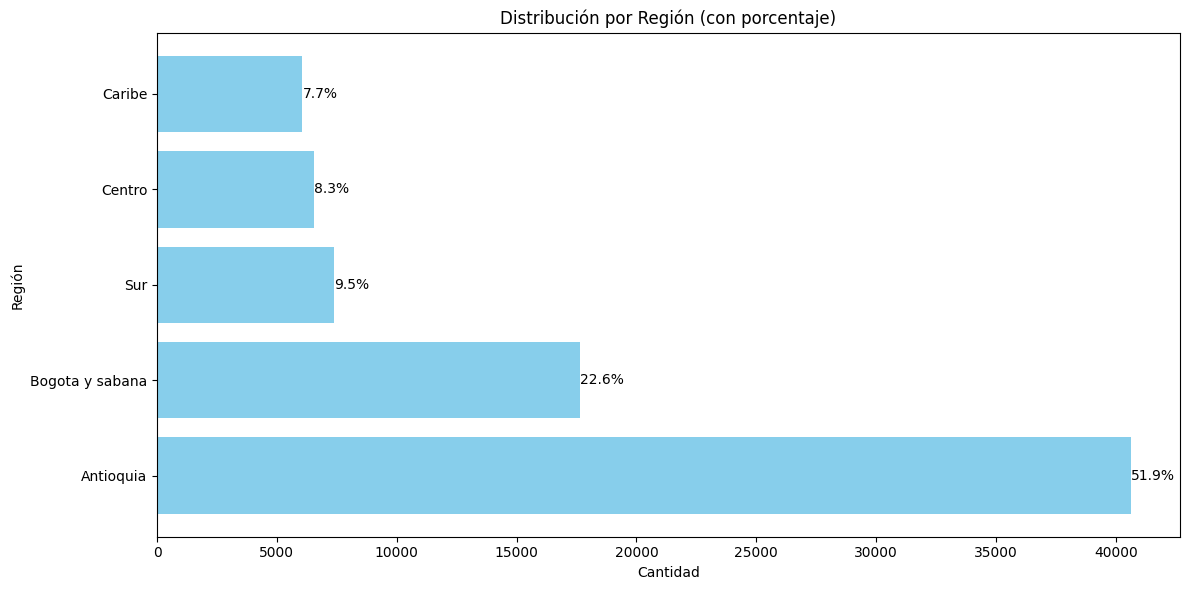

In [132]:
#Se realiza el nuevo el gráfico, después de la homologación

conteo = retiros_modelo['REGION'].value_counts()
porcentajes = conteo / conteo.sum() * 100

plt.figure(figsize=(12, 6))
bars = plt.barh(conteo.index, conteo.values, color='skyblue')

# Añadir etiquetas de porcentaje al lado de cada barra
for bar, porcentaje in zip(bars, porcentajes):
    plt.text(bar.get_width() + 5,            # posición x del texto
             bar.get_y() + bar.get_height()/2,  # posición y centrada
             f'{porcentaje:.1f}%',           # texto: porcentaje con 1 decimal
             va='center')

plt.title('Distribución por Región (con porcentaje)')
plt.xlabel('Cantidad')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

In [ ]:
#Se realiza de nuevo el grafico con el cambio

 #Validamos con el siguiente código, todos los valores únicos, permitiendo visualizar si tenemos valores nulos, caracteres especiales en todas las columnas a la vez
output = []
for col in retiros.columns:
    vc = retiros[col].value_counts(dropna=False).sort_index()
    total = vc.sum()
    output.append(f"{col}:\n{vc}\nTotal: {total}")
print('\n\n'.join(output))                                             

ID_EMPLEADOS:
ID_EMPLEADOS
12          1
30          1
34          1
41          1
42          1
           ..
90062236    1
90062248    1
90062257    1
90062315    1
92000929    1
Name: count, Length: 38566, dtype: int64
Total: 83142

COMPAÑÍA:
COMPAÑÍA
Banca de Inv. Bancolombia      390
Bancolombia S.A.             78771
Factoring Bancolombia S.A       24
Fiduciaria Bancolombia        2132
Leasing Bancolombia S.A.       454
Valores Bancolombia S.A.      1371
Name: count, dtype: int64
Total: 83142

CODIGO_AREA:
CODIGO_AREA
0           11
3            7
4           25
6            6
14           7
            ..
70006498     1
70006499     1
70006500     1
70006501     1
70006507     1
Name: count, Length: 4593, dtype: int64
Total: 83142

AREA:
AREA
 GCIA MERCADEO DE CANALES                    5
 GERENCIA COMERCIAL DE INCLUSION             1
 GERENCIA ESTRATEGIA CCIAL DE INCLUSION      1
 GERENCIA MERCADEO PERSONAS                  2
ADC ADMIN DE IDENTIDADES Y ACCESOS           4
     

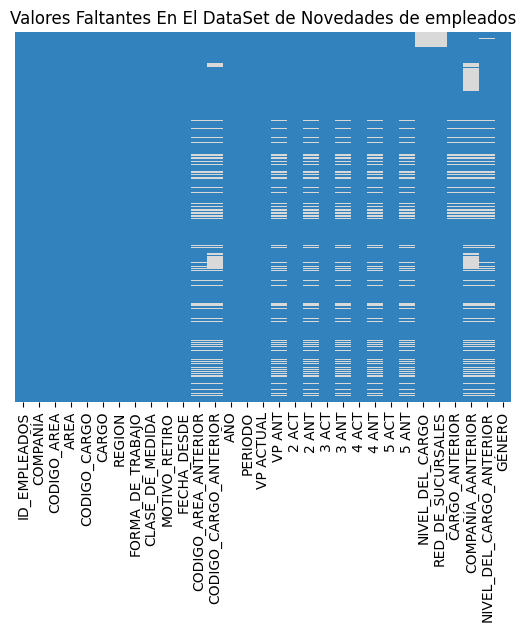

In [42]:
#Identificar datos faltantes de los features del dataset

sns.heatmap(retiros.isnull(), yticklabels=False, cbar=False, cmap='tab20c')
plt.title('Valores Faltantes En El DataSet de Novedades de empleados')
plt.show()


# **VALORES NULOS, CARACTERES ESPECIALES Y EN BLANCO**

Se revisa y se identifica que las siguientes columnas no presentan carácteres especiales, ni en blancos, más sin embargo, se identifican algunos valores nulos. Para este ejercicio determinamos que las columnas con un porcentaje de valores nulos mayor al 30% será eliminado.  veamos:
1. Area= 11
2. Còdigo de area= 2
3. Còdigo de cargo= 22579***20%
4. VP actual= 12
5. Vp Ant= 18543***17%
6. 2 act= 12
7. 2 ant= 18543***17%
8. 3 act= 12
9. 3 ant= 18543***17%
10. 4 act= 12
11. 4 ant= 18543***17%
12. 5 act= 12
13. 5 ant= 18543***17%
14. Nivel de cargo= 3387***3%
15. red de sucursales= 3387***3%
16. Cargo anterior= 7201***7%
17. Compañia anterior= 27928***26%
18. Nivel de cargo anterior= 18769***17%


Se analizan cada una de las columnas y se determina que no se presentan valores en blanco, ni carácteres especiales. Más sin embargo, se identifican algunos valores nulos que representan menos del 30%, por lo que por este motivo no será eliminadas.


# **LIMPIEZA**

# VARIABLE GENERO
Se identifica que la columna: "Género presenta inconsistencia en sus datos, se escribe de diferentes formas, por lo que se procede a limpiar la columna a continuación.

In [ ]:
retiros['GÉNERO'] = retiros['GÉNERO'].str.strip().str.lower()   #.str.strip() Este método elimina los espacios en blanco al inicio y al final de cada valor de texto en la columna.

                                                                #.str.lower() Después de quitar espacios, este método convierte todo el texto a minúsculas.
retiros['GÉNERO'] = retiros['GÉNERO'].replace({
    'femenino': 'Femenino',
    'feménino': 'Femenino',
    'masculino': 'Masculino',
    'masculíno': 'Masculino',
})


print(retiros['GÉNERO'].unique())

# VARIABLE NIVEL DE CARGO
Se identifica que la columna: "Nivel de cargo" presenta inconsistencia en sus datos, se escribe de diferentes formas, por lo que se procede a limpiar la columna a continuación.

In [ ]:
retiros['NIVEL_DEL_CARGO'] = retiros['NIVEL_DEL_CARGO'].replace('PROFESIONALES', 'PROFESIONAL')


In [ ]:
retiros.info()

Se revisa el tipo de datos de las columnas a trabajar en el modelo y se identifica que todas presentan el formato correcto; más sin embargo, se identifica que la variable año, es pertienente convertirla a categorica, ya que con este dato no se pueden sacar estadisticas. Y, la columna: periodo se debe convertir a: DATATIME, ya que es una fecha, además se identifica la necesidad de crear una nueva columna, para la variable a predecir, en este caso: "Retiros voluntarios"

# **CREAR COLUMNA PARA RETIROS VOLUNTARIOS Y RETIROS VOLUNTARIOS POR ARREGLO MUTUO"**

Vamos  a clasificar la variable a predecir como "RETIRO VOLUNTARIO" en donde sus valores van a ser:

1 --> Verdadero: El empleado se retiro voluntariamente (en este valor van a estar relacionados de la variable MOTIVO  DE RETIRO, los valores de "RETIRO VOLUNTARIO" y "VOLUNTARIO ARREGLO MUTUO"

0 --> Falso: El empelado se retiro de su cargo por cualquier otro motivo  los cuales estan relacionados en la variable MOTIVO  DE RETIRO ≠ "RETIRO VOLUNTARIO" y "VOLUNTARIO ARREGLO MUTUO"

In [ ]:
retiros['RETIRO_VOLUNTARIO'] = np.where(
    retiros['MOTIVO_RETIRO'].isin(['RETIRO VOLUNTARIO', 'VOLUNTARIO ARREGLO MUTUO']),
    1,
    0
)

In [ ]:
print(retiros['RETIRO_VOLUNTARIO'].value_counts().sort_index())
print("Suma total frecuencia:", retiros['RETIRO_VOLUNTARIO'].value_counts(dropna=False).sum())

In [ ]:
retiros.sample(2)

In [ ]:
retiros.info()

# ESTADISTICA DESCRIPTIVA

In [ ]:
variables_modelo = [
    "COMPAÑÍA", "CODIGO_AREA", "AREA", "CODIGO_CARGO", "CARGO", "REGION",
    "FORMA_DE_TRABAJO", "AÑO", "PERIODO", "GÉNERO", "RETIRO_VOLUNTARIO", "NIVEL_DEL_CARGO","RED_DE_SUCURSALES"
]

In [ ]:
retiros_reducido = retiros[variables_modelo].copy()

Convertimos 'RETIRO_VOLUNTARIO' como BOOLEANA para poderlo representar mejor en un diagrama de barras

In [ ]:
retiros['RETIRO_VOLUNTARIO'] = retiros['RETIRO_VOLUNTARIO'].astype("bool")

In [ ]:
import plotly.express as px

# Reemplazar True/False por "Sí"/"No"
conteo = retiros_reducido['RETIRO_VOLUNTARIO'].replace({True: "Sí", False: "No"}).value_counts().reset_index()
conteo.columns = ['RETIRO_VOLUNTARIO', 'count']

# Crear gráfico de barras con etiquetas visibles
fig = px.bar(
    conteo,
    x='RETIRO_VOLUNTARIO',
    y='count',
    text='count',
    labels={'RETIRO_VOLUNTARIO': '¿Se retiró voluntariamente?', 'count': 'Cantidad'},
    title='Retiros voluntarios en Bancolombia',
    width=600,
    height=500  # Aumenta altura para dar más espacio
)

# Posición y estilo del texto
fig.update_traces(
    textposition='outside',
    textfont_size=14  # Tamaño más grande para mejor lectura
)

# Ajustar márgenes y diseño
fig.update_layout(
    margin=dict(t=100),  # Espacio superior extra
    yaxis_title='Cantidad',
    xaxis_title='¿Se retiró voluntariamente?',
    uniformtext_minsize=8,
    uniformtext_mode='show'
)

fig.show()

In [ ]:
import plotly.express as px

# Paso 1: Top 20 códigos de área
top_areas = retiros['CODIGO_AREA'].value_counts().head(20).index

# Paso 2: Filtrar los datos
df_top = retiros[retiros['CODIGO_AREA'].isin(top_areas)]

# Paso 3: Agrupar por código de área y retiro voluntario
grouped = df_top.groupby(['CODIGO_AREA', 'RETIRO_VOLUNTARIO'], observed=True).size().reset_index(name='Cantidad')

# Paso 4: Convertir booleanos a texto
grouped['RETIRO_VOLUNTARIO'] = grouped['RETIRO_VOLUNTARIO'].map({False: 'No', True: 'Sí'})

# Paso 5: Asegurar que el código de área sea string
grouped['CODIGO_AREA'] = grouped['CODIGO_AREA'].astype(str)

# Paso 6: Crear el gráfico
fig = px.bar(
    grouped,
    x='CODIGO_AREA',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Top 20 Códigos de Área vs Retiro Voluntario',
    labels={
        'CODIGO_AREA': 'Código de Área',
        'Cantidad': 'Número de Retiros',
        'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'
    },
    barmode='stack'
)

# Paso 7: Ajustar el ángulo de las etiquetas
fig.update_layout(xaxis_tickangle=-45)

# Mostrar el gráfico
fig.show()


In [ ]:
import plotly.express as px

# Paso 1: Top 20 áreas por cantidad de retiros
top_areas = retiros_reducido['AREA'].value_counts().head(20).index

# Paso 2: Filtrar el DataFrame por las top 20 áreas
df_top = retiros_reducido[retiros_reducido['AREA'].isin(top_areas)]

# Paso 3: Agrupar por AREA y RETIRO_VOLUNTARIO
grouped = df_top.groupby(['AREA', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 4: Asegurar que AREA esté como string (por si acaso)
grouped['AREA'] = grouped['AREA'].astype(str)

# Paso 5: Crear el gráfico apilado
fig = px.bar(
    grouped,
    x='AREA',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Top 20 Áreas vs Retiro Voluntario',
    labels={
        'AREA': 'Área',
        'Cantidad': 'Número de Retiros',
        'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'
    },
    barmode='stack'  # Apilado
)

# Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,
    width=1500,  # Ancho del gráfico
    height=800   # Alto del gráfico
)

fig.show()


In [ ]:
import plotly.express as px

# Paso 1: Top 20 códigos de cargo
top_cargos = retiros_reducido['CODIGO_CARGO'].value_counts().head(20).index

# Paso 2: Filtrar el DataFrame por los top 20 códigos de cargo
df_top = retiros_reducido[retiros_reducido['CODIGO_CARGO'].isin(top_cargos)]

# Paso 3: Agrupar por código de cargo y retiro voluntario
grouped = df_top.groupby(['CODIGO_CARGO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 4: Asegurar que CODIGO_CARGO esté como string para que sea categórico en el eje X
grouped['CODIGO_CARGO'] = grouped['CODIGO_CARGO'].astype(str)

# Paso 5: Crear el gráfico apilado
fig = px.bar(
    grouped,
    x='CODIGO_CARGO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Top 20 Códigos de Cargo vs Retiro Voluntario',
    labels={'CODIGO_CARGO': 'Código de Cargo', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack'  # Apilado
)

# Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,
    width=1500,  # Ancho del gráfico
    height=800   # Alto del gráfico
)

fig.show()

In [ ]:
# Mostrar la tabla con el top 20 de códigos de cargo y retiro voluntario
tabla_top20 = grouped.sort_values(by='Cantidad', ascending=False)
display(tabla_top20.sort_index())


In [ ]:
import plotly.express as px

# Paso 1: Top 20 cargos por cantidad de retiros
top_cargos = retiros_reducido['CARGO'].value_counts().head(20).index

# Paso 2: Filtrar el DataFrame por los top 20 cargos
df_top = retiros_reducido[retiros_reducido['CARGO'].isin(top_cargos)]

# Paso 3: Agrupar por CARGO y RETIRO_VOLUNTARIO
grouped = df_top.groupby(['CARGO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 4: Asegurar que CARGO esté como string para que sea categórico en el eje X
grouped['CARGO'] = grouped['CARGO'].astype(str)

# Paso 5: Crear el gráfico apilado
fig = px.bar(
    grouped,
    x='CARGO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Top 20 Cargos vs Retiro Voluntario',
    labels={'CARGO': 'Cargo', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack'  # Apilado
)

# Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,
    width=1500,  # Ancho
    height=800   # Alto
)

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# Paso 1: Reemplazar los nombres de los meses con su formato en inglés
month_translation = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'sep': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Asegurarse de que los valores de la columna 'PERIODO' estén en minúsculas
retiros_reducido['PERIODO'] = retiros_reducido['PERIODO'].str.lower()

# Reemplazar los meses con su formato en inglés
retiros_reducido['PERIODO'] = retiros_reducido['PERIODO'].replace(month_translation, regex=True)

# Paso 2: Convertir la columna PERIODO a formato datetime (ahora con meses en inglés)
retiros_reducido['PERIODO'] = pd.to_datetime(retiros_reducido['PERIODO'], format='%b-%y', errors='coerce')

# Paso 3: Verificar si hay valores nulos después de la conversión
print(retiros_reducido[retiros_reducido['PERIODO'].isna()])

# Paso 4: Calcular el número de bins según la regla de Freedman-Diaconis
Q1 = retiros_reducido['PERIODO'].quantile(0.25)
Q3 = retiros_reducido['PERIODO'].quantile(0.75)
IQR = Q3 - Q1
bin_width = 2 * IQR / (len(retiros_reducido['PERIODO']) ** (1 / 3))
bins = int((retiros_reducido['PERIODO'].max() - retiros_reducido['PERIODO'].min()) / bin_width)

# Paso 5: Crear el gráfico apilado con la variable RETIRO_VOLUNTARIO
fig = px.histogram(
    retiros_reducido,
    x='PERIODO',
    color='RETIRO_VOLUNTARIO',  # Apilar según RETIRO_VOLUNTARIO
    nbins=bins,  # Número de bins calculado
    title='Histograma de Frecuencia de Periodo por Retiro Voluntario',
    labels={'PERIODO': 'Periodo', 'count': 'Frecuencia'},
    barmode='stack',  # Apilado
    color_discrete_map={  # Asignar colores específicos
        False: 'blue',    # Falso será azul
        True: 'orange'    # Verdadero será naranja
    }
)

# Paso 6: Agregar contornos a las barras y modificar el tamaño del gráfico
fig.update_traces(marker_line_width=2, marker_line_color='black')  # Contornos de las barras en negro

# Paso 7: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,  # Cambiar el ancho según desees
    height=600   # Cambiar la altura según desees
)

# Mostrar el gráfico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Paso 1: Agrupar por la variable COMPAÑÍA y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['COMPAÑÍA', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 2: Asegurarse de que la columna COMPAÑÍA esté como string (si es necesario)
grouped['COMPAÑÍA'] = grouped['COMPAÑÍA'].astype(str)

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='COMPAÑÍA',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Compañía y Retiro Voluntario',
    labels={'COMPAÑÍA': 'Compañía', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1600,  # Ancho del gráfico
    height=900   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Paso 1: Agrupar por la variable REGION y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['REGION', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 2: Asegurarse de que la columna REGION esté como string (si es necesario)
grouped['REGION'] = grouped['REGION'].astype(str)

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='REGION',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Región y Retiro Voluntario',
    labels={'REGION': 'Región', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()


Pasos para un Feature Engineering

In [ ]:
import pandas as pd
import plotly.express as px

# Paso 1: Agrupar por la variable FORMA_DE_TRABAJO y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['FORMA_DE_TRABAJO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 2: Asegurarse de que la columna FORMA_DE_TRABAJO esté como string (si es necesario)
grouped['FORMA_DE_TRABAJO'] = grouped['FORMA_DE_TRABAJO'].astype(str)

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='FORMA_DE_TRABAJO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Forma de Trabajo y Retiro Voluntario',
    labels={'FORMA_DE_TRABAJO': 'Forma de Trabajo', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Paso 1: Asegurarse de que la columna AÑO sea de tipo string (si es necesario)
retiros_reducido['AÑO'] = retiros_reducido['AÑO'].astype(str)

# Paso 2: Agrupar por la variable AÑO y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['AÑO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='AÑO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Año y Retiro Voluntario',
    labels={'AÑO': 'Año', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Paso 1: Asegurarse de que la columna GÉNERO sea de tipo string (si es necesario)
retiros_reducido['GÉNERO'] = retiros_reducido['GÉNERO'].astype(str)

# Paso 2: Agrupar por la variable GÉNERO y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['GÉNERO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='GÉNERO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Género y Retiro Voluntario',
    labels={'GÉNERO': 'Género', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Paso 1: Asegurarse de que la columna NIVEL_DEL_CARGO sea de tipo string (si es necesario)
retiros_reducido['NIVEL_DEL_CARGO'] = retiros_reducido['NIVEL_DEL_CARGO'].astype(str)

# Paso 2: Agrupar por la variable NIVEL_DEL_CARGO y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['NIVEL_DEL_CARGO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='NIVEL_DEL_CARGO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Nivel del Cargo y Retiro Voluntario',
    labels={'NIVEL_DEL_CARGO': 'Nivel del Cargo', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Paso 1: Asegurarse de que la columna RED_DE_SUCURSALES sea de tipo string (si es necesario)
retiros_reducido['RED_DE_SUCURSALES'] = retiros_reducido['RED_DE_SUCURSALES'].astype(str)

# Paso 2: Agrupar por la variable RED_DE_SUCURSALES y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['RED_DE_SUCURSALES', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='RED_DE_SUCURSALES',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Red de Sucursales y Retiro Voluntario',
    labels={'RED_DE_SUCURSALES': 'Red de Sucursales', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()

In [ ]:
# base libraries for data science
from pathlib import Path

import pandas as pd
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
retiros.info()

ELIMINACIÓN DE COLUMNAS NO NECESARIAS PARA EL MODELO

In [ ]:
variables_modelo = [
    "COMPAÑÍA", "CODIGO_AREA", "AREA", "CODIGO_CARGO", "CARGO", "REGION",
    "FORMA_DE_TRABAJO", "AÑO", "PERIODO", "GÉNERO", "RETIRO_VOLUNTARIO", "NIVEL_DEL_CARGO","RED_DE_SUCURSALES"
]

Estas variables describen al empleado antes del retiro y son apropiadas para entrenar el modelo:

COMPAÑÍA, CODIGO_AREA, AREA, CODIGO_CARGO, CARGO, REGION, FORMA_DE_TRABAJO, AÑO, PERIODO, GÉNERO.

El resto de variables se eliminan de la variable retiro_reducido, por qué no aporta información pertinente para el modelo o estas variables reflejan la decisión o consecuencia del retiro, o están muy relacionadas con la definición directa del target, por lo que confundiria el modelo.

In [ ]:
retiros_reducido = retiros[variables_modelo].copy()
retiros_reducido

In [ ]:
retiros_reducido.info()

VALORES FALTANTES

In [ ]:
retiros_reducido.isna().sum()

DATOS DUPLICADOS

In [ ]:
filas_duplicadas = retiros_reducido.duplicated().sum()
print("Cantidad de filas duplicadas: ", filas_duplicadas)

Se identifica que al renombrar el dataframe y manejar solo las variables necesarias para el modelo, tenemos información duplicada, pero esto se debe a que se elimina el ID; por lo que es normal que se repitan las filas con datos comunes entre sí.

In [ ]:
retiros_reducido.info()

INGENIERIA DE DATOS

In [ ]:
# Codificar la variable objetivo

retiros_reducido["RETIRO_VOLUNTARIO"] = retiros_reducido["RETIRO_VOLUNTARIO"].astype("int")               #.astype, se utiliza para cambiar el tipo de dato

retiros_reducido.sample(5)

In [ ]:
# Categoricas ordinales y target

target = 'RETIRO_VOLUNTARIO'

cols_categoric_ordinal = ["AÑO"]
print(cols_categoric_ordinal)

In [ ]:
# Columnas categóricas (no ordenadas)

cols_categoric_nominales = retiros_reducido.select_dtypes(include=['object', 'category']).columns.tolist()   #se puede hacer con el código de las ordinales o con este, llamando directamente los object y categoricos
cols_categoric_nominales

In [ ]:
# Columnas fecha
cols_fecha = retiros_reducido.select_dtypes(include=['datetime64[ns]']).columns.tolist()
cols_fecha

# **PIPELINES**

In [ ]:
categorical_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder()),
    ]
)

In [ ]:
categorical_ord_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinal", OrdinalEncoder()),
    ]
)

# **PREPROCESADOR**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[        ("categoric", categorical_pipe, cols_categoric_nominales),
        ("categoric ordinales", categorical_ord_pipe, cols_categoric_ordinal),
    ]
)

preprocessor

# **Train / Test split**

In [ ]:
# conjunto de entrenamiento y de prueba

X_features = retiros_reducido.drop("RETIRO_VOLUNTARIO", axis="columns")
Y_target = retiros_reducido["RETIRO_VOLUNTARIO"]

In [ ]:
# 80% train, 20% test

x_train, x_test, y_train, y_test = train_test_split(
    X_features, Y_target, test_size=0.2, stratify=Y_target
)

In [ ]:
# Verificamos dimensiones

x_train.shape, y_train.shape

In [ ]:
# Verificamos dimensiones

x_test.shape, y_test.shape

# **Preprocesamiento**

In [ ]:
transformed_data = preprocessor.fit(x_train)

transformed_data

In [ ]:
feature_names = preprocessor.get_feature_names_out()

feature_names

Para ver con más detalle las transformaciones del one hote encoding, podemos convertir rápidamente en un dataframe las variables preprocesadas: